# Regularización

Bienvenidos a la segunda tarea de esta semana. Los modelos de aprendizaje profundo tienen tanta flexibilidad y capacidad que el **sobreajuste puede ser un problema grave**, si el conjunto de datos de entrenamiento no es lo suficientemente grande. ¡Seguro que lo hace bien en el conjunto de entrenamiento, pero la red aprendida **no generaliza a nuevos ejemplos** que nunca ha visto!

**Aprenderás a:** Utilizar la regularización en tus modelos de aprendizaje profundo.

¡Empecemos!

## Table of Contents
- [1 - Packages](#1)
- [2 - Problem Statement](#2)
- [3 - Loading the Dataset](#3)
- [4 - Non-Regularized Model](#4)
- [5 - L2 Regularization](#5)
    - [Exercise 1 - compute_cost_with_regularization](#ex-1)
    - [Exercise 2 - backward_propagation_with_regularization](#ex-2)
- [6 - Dropout](#6)
    - [6.1 - Forward Propagation with Dropout](#6-1)
        - [Exercise 3 - forward_propagation_with_dropout](#ex-3)
    - [6.2 - Backward Propagation with Dropout](#6-2)
        - [Exercise 4 - backward_propagation_with_dropout](#ex-4)
- [7 - Conclusions](#7)

<a name='1'></a>
## 1 - Packages

In [13]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import scipy.io
from reg_utils import sigmoid, relu, plot_decision_boundary, initialize_parameters, load_2D_dataset, predict_dec
from reg_utils import compute_cost, predict, forward_propagation, backward_propagation, update_parameters
from testCases import *
from public_tests import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<a name='2'></a>
## 2 - Problem Statement

Acabas de ser contratado como experto en Inteligencia Artificial por la Sociedad Francesa de Fútbol. Quieren que les recomiendes las posiciones en las que el portero de Francia debe patear el balón para que los jugadores del equipo francés puedan golpearlo con la cabeza. 

<img src="images/field_kiank.png" style="width:600px;height:350px;">

<caption><center><font color='purple'><b>Figure 1</b>: Campo de fútbol. El portero lanza el balón al aire, los jugadores de cada equipo luchan por golpear el balón con la cabeza </font></center></caption>


Te dan el siguiente conjunto de datos en 2D de los últimos 10 partidos de Francia.

<a name='3'></a>
## 3 - Loading the Dataset

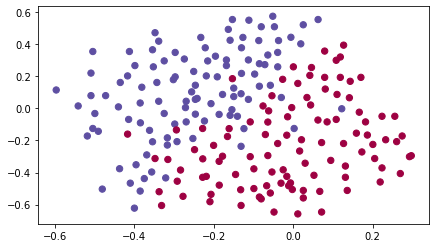

In [14]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()

Cada punto corresponde a una posición en el campo de fútbol en la que un jugador de fútbol ha golpeado el balón con la cabeza después de que el portero francés haya disparado el balón desde el lado izquierdo del campo de fútbol.
- Si el punto es azul, significa que el jugador francés ha conseguido golpear el balón con la cabeza
- Si el punto es rojo, significa que el jugador del otro equipo golpeó el balón con la cabeza

**Tu objetivo**: Utiliza un modelo de aprendizaje profundo para encontrar las posiciones del campo en las que el portero debe patear el balón.

**Análisis del conjunto de datos**: Este conjunto de datos es un poco ruidoso, pero parece que una línea diagonal que separe la mitad superior izquierda (azul) de la mitad inferior derecha (roja) funcionaría bien. 

Primero probarás un modelo no regularizado. Luego aprenderás a regularizarlo y decidirás qué modelo elegirás para resolver el problema de la Sociedad Francesa de Fútbol. 

<a name='4'></a>
## 4 - Modelo no regularizado

Utilizará la siguiente red neuronal (ya implementada para usted a continuación). Este modelo puede ser utilizado
- en *modo de regularización* -- estableciendo la entrada `lambd` a un valor distinto de cero. Usamos "`lambd`" en lugar de "`lambda`" porque "`lambda`" es una palabra clave reservada en Python. 
- en *modo dropout* -- estableciendo el `keep_prob` a un valor menor que uno

Primero probarás el modelo sin ninguna regularización. Luego, implementarás:
- *L2 regularización* -- funciones: "`compute_cost_with_regularization()`" y "`backward_propagation_with_regularization()`"
- *Dropout* -- funciones: "`forward_propagation_with_dropout()`" y "`backward_propagation_with_dropout()`"

En cada parte, ejecutarás este modelo con las entradas correctas para que llame a las funciones que has implementado. Echa un vistazo al código siguiente para familiarizarte con el modelo.

In [15]:
def model(X, Y, learning_rate = 0.3, num_iterations = 30000, print_cost = True, lambd = 0, keep_prob = 1):
    """
    Implementa una red neuronal de tres capas: LINEAL->RELU->LINEAL->RELU->LINEAL->SIGMOIDE.
    
    Argumentos:
    X -- datos de entrada, de forma (tamaño de la entrada, número de ejemplos)
    Y -- vector "etiqueta" verdadera (1 para el punto azul / 0 para el punto rojo), de forma (tamaño de la salida, número de ejemplos)
    learning_rate -- tasa de aprendizaje de la optimización
    num_iterations -- número de iteraciones del bucle de optimización
    print_cost -- Si es True, imprime el coste cada 10000 iteraciones
    lambd -- hiperparámetro de regularización, escalar
    keep_prob - probabilidad de mantener una neurona activa durante el abandono, escalar.
    
    Devuelve:
    parameters -- parámetros aprendidos por el modelo. Pueden ser utilizados para predecir.
    """
        
    grads = {}
    costs = []                            # to llevar el control de los costos
    m = X.shape[1]                        # numero de ejemplos
    layers_dims = [X.shape[0], 20, 3, 1]
    
    # Initialize parameters dictionary.
    parameters = initialize_parameters(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        if keep_prob == 1:
            a3, cache = forward_propagation(X, parameters)
        elif keep_prob < 1:
            a3, cache = forward_propagation_with_dropout(X, parameters, keep_prob)
        
        # Cost function
        if lambd == 0:
            cost = compute_cost(a3, Y)
        else:
            cost = compute_cost_with_regularization(a3, Y, parameters, lambd)
            
        # Backward propagation.
        assert (lambd == 0 or keep_prob == 1)   # it is possible to use both L2 regularization and dropout, 
                                                # but this assignment will only explore one at a time
        if lambd == 0 and keep_prob == 1:
            grads = backward_propagation(X, Y, cache)
        elif lambd != 0:
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        elif keep_prob < 1:
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 10000 iterations
        if print_cost and i % 10000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Entrenemos el modelo sin ninguna regularización y observemos la precisión en los conjuntos de entrenamiento/prueba.

Cost after iteration 0: 0.6557412523481002
Cost after iteration 10000: 0.1632998752572419
Cost after iteration 20000: 0.13851642423259714


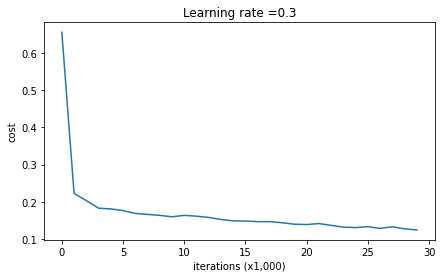

On the training set:
Accuracy: 0.9478672985781991
On the test set:
Accuracy: 0.915


In [16]:
parameters = model(train_X, train_Y)
print ("On the training set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

La precisión de entrenamiento es del 94,8%, mientras que la precisión de prueba es del 91,5%. Este es el **modelo base** (observará el impacto de la regularización en este modelo). Ejecute el siguiente código para trazar el límite de decisión de su modelo.

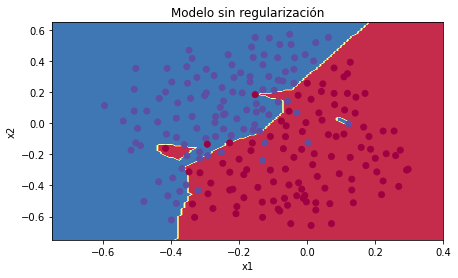

In [17]:
plt.title("Modelo sin regularización")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

El modelo no regularizado está obviamente sobreajustando el conjunto de entrenamiento. Se está ajustando a los puntos ruidosos. Veamos ahora dos técnicas para reducir el sobreajuste.

<a name='5'></a>
## 5 - Regularización L2

La forma estándar de evitar el sobreajuste se llama **regularización L2**. Consiste en modificar adecuadamente su función de coste, de:
$$J = -\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small  y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} \tag{1}$$
To:
$$J_{regularized} = \small \underbrace{-\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} }_\text{cross-entropy cost} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_l\sum\limits_k\sum\limits_j W_{k,j}^{[l]2} }_\text{L2 regularization cost} \tag{2}$$

Modifiquemos su coste y observemos las consecuencias.

<a name='ex-1'></a>
### Exercise 1 - compute_cost_with_regularization
Implementa `calcular_coste_con_regularización()` que calcula el coste dado por la fórmula (2). Para calcular $\sum\limits_k\sum\limits_j W_{k,j}^{[l]2}$  , use :
```python
np.sum(np.square(Wl))
```
Tenga en cuenta que tiene que hacer esto para $W^{[1]}$, $W^{[2]}$ and $W^{[3]}$, luego sumar los tres términos y multiplicar por $ \frac{1}{m} \frac{\lambda}{2} $.

In [18]:
# GRADED FUNCTION: compute_cost_with_regularization

def compute_cost_with_regularization(A3, Y, parameters, lambd):
    """
    Implementar la función de coste con regularización L2. Véase la fórmula (2) anterior.
    
    Argumentos:
    A3 -- post-activación, salida de la propagación hacia delante, de forma (tamaño de la salida, número de ejemplos)
    Y -- vector de etiquetas "verdaderas", de forma (tamaño de la salida, número de ejemplos)
    parameters -- diccionario python que contiene los parámetros del modelo
    
    Devuelve:
    cost - valor de la función de pérdida regularizada (fórmula (2))
    """
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    
    cross_entropy_cost     = compute_cost(A3, Y) # This gives you the cross-entropy part of the cost
    L2_regularization_cost = ( np.sum( np.square( W1 ) ) + 
                               np.sum( np.square( W2 ) ) + 
                               np.sum( np.square( W3 ) ) 
    cost                   = cross_entropy_cost + L2_regularization_cost
    
    return cost

SyntaxError: invalid syntax (<ipython-input-18-c46b4b7c940f>, line 24)

In [ ]:
A3, t_Y, parameters = compute_cost_with_regularization_test_case()
cost = compute_cost_with_regularization(A3, t_Y, parameters, lambd=0.1)
print("cost = " + str(cost))

compute_cost_with_regularization_test(compute_cost_with_regularization)

Por supuesto, al cambiar el coste, ¡también hay que cambiar la propagación hacia atrás! Todos los gradientes tienen que ser calculados con respecto a este nuevo coste. 

<a name='ex-2'></a>
### Exercise 2 - backward_propagation_with_regularization
Implementa los cambios necesarios en la propagación hacia atrás para tener en cuenta la regularización. Los cambios Para cada uno de los epoch, tienes que añadir el gradiente del término de regularización ($\frac{d}{dW} ( \frac{1}{2}\frac{\lambda}{m}  W^2) = \frac{\lambda}{m} W$).

In [ ]:
def backward_propagation_with_regularization(X, Y, cache, lambd):
    """
    Implementa la propagación hacia atrás de nuestro modelo base al que añadimos una regularización L2.
    
    Argumentos:
    X -- conjunto de datos de entrada, de forma (tamaño de entrada, número de ejemplos)
    Y -- vector de etiquetas "verdaderas", de forma (tamaño de la salida, número de ejemplos)
    cache -- caché de salida de forward_propagation()
    lambd -- hiperparámetro de regularización, escalar
    
    Devuelve:
    gradientes -- Un diccionario con los gradientes respecto a cada parámetro, variables de activación y preactivación
    """
    
    m = X.shape[1]
    
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    
    dW3 = 1./m * np.dot(dZ3, A2.T) + lambd * W3 / m
    db3 = 1. / m * np.sum(dZ3, axis = 1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    
    dW2 = 1./m * np.dot(dZ2, A1.T) + lambd * W2 / m
    db2 = 1. / m * np.sum(dZ2, axis = 1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    
    dW1 = 1. / m * np.dot(dZ1, X.T) + lambd * W1 / m
    db1 = 1. / m * np.sum(dZ1, axis = 1, keepdims = True)
    
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

In [ ]:
t_X, t_Y, cache = backward_propagation_with_regularization_test_case()

grads = backward_propagation_with_regularization(t_X, t_Y, cache, lambd = 0.7)
print ("dW1 = \n"+ str(grads["dW1"]))
print ("dW2 = \n"+ str(grads["dW2"]))
print ("dW3 = \n"+ str(grads["dW3"]))
backward_propagation_with_regularization_test(backward_propagation_with_regularization)

Ahora vamos a ejecutar el modelo con regularización L2 $(\lambda = 0.7)$. La función `model()` llamará: 
- `compute_cost_with_regularization` en lugar de `compute_cost`.
- `propagación_hacia_atrás_con_regularización` en lugar de `propagación_hacia_atrás`.

In [ ]:
parameters = model(train_X, train_Y, lambd = 0.7)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

Felicidades, la precisión del conjunto de pruebas ha aumentado al 93%. Has salvado a la selección francesa de fútbol.

Ya no estás sobreajustando los datos de entrenamiento. Vamos a trazar el límite de decisión.

In [ ]:
plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**Observaciones**:
- El valor de $\lambda$ es un hiperparámetro que se puede ajustar usando un dev set.
- L2 regularización hace que su límite de decisión más suave. If $\lambda$ es demasiado grande, también es posible "oversmooth", lo que resulta en un modelo con alto sesgo.

**¿Qué hace realmente la regularización L2?**:

La regularización L2 se basa en la suposición de que un modelo con pesos pequeños es más sencillo que un modelo con pesos grandes. Así, al penalizar los valores cuadrados de las ponderaciones en la función de costes, se llevan todas las ponderaciones a valores más pequeños. Es demasiado costoso para el coste tener pesos grandes. Esto conduce a un modelo más suave en el que la salida cambia más lentamente a medida que cambia la entrada. 

<br>
<font color='green'>
    
** Lo que debe recordar:** las implicaciones de la L2-regularización en:
- El cálculo de costes:
    - A los costes se les añade un término de regularización.
- The Backpropagation function (la función de retropropagación):
    - Hay términos extra en los gradientes con respecto a las matrices de pesos.
- Los pesos terminan siendo más pequeños. ("weight decay"): 
    - Los pesos son empujados a valores más pequeños

<a name='6'></a>
## 6 - Dropout

Por último, el **dropout** es una técnica de regularización muy utilizada que es específica del aprendizaje profundo. 
**En cada iteración se apagan aleatoriamente algunas neuronas.


Para entender el abandono, considera esta conversación con un amigo:
- Amigo: "¿Por qué necesitas todas estas neuronas para entrenar tu red y clasificar imágenes?". 
- Usted: "Porque cada neurona contiene un peso y puede aprender características/detalles/formas específicas de una imagen. Cuantas más neuronas tenga, ¡más características aprende mi modelo!".
- Amigo: "Ya veo, pero ¿estás seguro de que tus neuronas están aprendiendo características diferentes y no todas las mismas características?"
- Usted: "Buena observación... Las neuronas de una misma capa no se comunican entre sí. Debería ser definitivamente posible que aprendieran las mismas características/formas/detalles de la imagen... lo que sería redundante. Debería haber una solución".
 


<center>
<video width="620" height="440" src="images/dropout1_kiank.mp4" type="video/mp4" controls>
</video>
</center>
<br>
<caption><center><font color='pink'><b>Figure 2 </b>: <b>Desconexión en la segunda capa oculta.</b> <br> En cada iteración, se apaga (= se pone a cero) cada neurona de una capa con probabilidad $1 - keep\_prob$ o se mantiene con probabilidad $keep\_prob$ (50% aquí). Las neuronas que se han caído no contribuyen al entrenamiento tanto en la propagación hacia delante como hacia atrás de la iteración. </font></center></caption>

<center>
<video width="620" height="440" src="images/dropout2_kiank.mp4" type="video/mp4" controls>
</video>
</center>

<caption><center><font color='pink'><b>Figure 3</b>:<b> Drop-out en la primera y tercera capa oculta. . </b><br> $1^{st}$ layer: apagamos una media del 40% de las neuronas..  $3^{rd}$ layer: apagamos una media del 20% de las neuronas. </font></center></caption><br>


<p>Cuando apagas algunas neuronas, en realidad modificas tu modelo. La idea que subyace al abandono es que en cada iteración se entrena un modelo diferente que utiliza sólo un subconjunto de neuronas. Con el dropout, tus neuronas se vuelven menos sensibles a la activación de otra neurona específica, porque esa otra neurona puede apagarse en cualquier momento.</p>

<a name='6-1'></a>
### 6.1 - Forward Propagation with Dropout

<a name='ex-3'></a>
### Exercise 3 - forward_propagation_with_dropout

Implementa la propagación hacia adelante con dropout. Se utiliza una red neuronal de 3 capas, y se añadirá dropout a la primera y segunda capa oculta. No aplicaremos dropout a la capa de entrada ni a la de salida. 

**Instrucciones**:
Usted quiere apagar algunas neuronas en la primera y segunda capa. Para ello, vas a realizar 4 pasos:

1. En la clase, hablamos de crear una variable $d^{[1]}$ con la misma forma que $a^{[1]}$ utilizando `np.random.rand()` para obtener aleatoriamente números entre 0 y 1. Aquí se utilizará una implementación vectorizada, por lo que se creará una matriz aleatoria $D^{[1]} = [d^{[1](1)} d^{[1](2)} ... d^{[1](m)}] $ de la misma dimensión que $A^{[1]}$.
2. Establecer cada entrada de $D^{[1]}$ como 1 con probabilidad (`keep_prob`), y 0 en caso contrario.

**Sugerencia:** Digamos que keep_prob = 0.8, lo que significa que queremos mantener alrededor del 80% de las neuronas y descartar alrededor del 20% de ellas.  Queremos generar un vector que tenga 1's y 0's, donde alrededor del 80% de ellos son 1 y alrededor del 20% son 0.
Esta declaración de python:  
`X = (X < keep_prob).astype(int)`  

Es conceptualmente lo mismo que esta sentencia if-else (para el caso simple de un array unidimensional) :

```
for i,v in enumerate(x):
    if v < keep_prob:
        x[i] = 1
    else: # v >= keep_prob
        x[i] = 0
```
Observe que `X = (X < keep_prob).astype(int)` funciona con matrices multidimensionales, y la salida resultante conserva las dimensiones de la matriz de entrada.

Observa también que sin usar `.astype(int)`, el resultado es un array de booleanos `Verdadero` y `Falso`, que Python convierte automáticamente en 1 y 0 si lo multiplicamos con números.  (Sin embargo, es mejor práctica convertir los datos en el tipo de datos que pretendemos, así que prueba a usar `.astype(int)`).

3. Poner $A^{[1]}$ en $A^{[1]} * D^{[1]}$. (Estás apagando algunas neuronas). Puedes pensar en $D^{[1]}$ como una máscara, de modo que cuando se multiplica con otra matriz, apaga algunos de los valores.
4. Dividir $A^{[1]}$ por `keep_prob`. Al hacer esto usted está asegurando que el resultado del costo seguirá teniendo el mismo valor esperado como sin abandono. (Esta técnica también se llama abandono invertido).

In [19]:
# GRADED FUNCTION: forward_propagation_with_dropout

def forward_propagation_with_dropout(X, parameters, keep_prob = 0.5):
    """
    Implementa la propagación hacia adelante: LINEAL -> RELU + DROPOUT -> LINEAL -> RELU + DROPOUT -> LINEAL -> SIGMOIDE.
    
    Argumentos:
    X -- conjunto de datos de entrada, de forma (2, número de ejemplos)
    parameters -- diccionario python que contiene sus parámetros "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- matriz de pesos de la forma (20, 2)
                    b1 -- vector de sesgo de la forma (20, 1)
                    W2 -- matriz de pesos de la forma (3, 20)
                    b2 -- vector de sesgo de la forma (3, 1)
                    W3 -- matriz de pesos de la forma (1, 3)
                    b3 -- vector de sesgo de la forma (1, 1)
    keep_prob - probabilidad de mantener una neurona activa durante el abandono, escalar
    
    Devuelve:
    A3 -- último valor de activación, salida de la propagación hacia delante, de forma (1,1)
    cache -- tupla, información almacenada para calcular la propagación hacia atrás
    """
    
    np.random.seed(1)
    
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    
    # Paso 1: inicializar la matriz D1 = np.random.rand(..., ...)
    D1 = np.random.rand(A1.shape[0], A1.shape[1])
    # Paso 2: convertir las entradas de D1 en 0 o 1 (utilizando keep_prob como umbral)
    D1 = D1 < keep_prob                                     
    # Paso 3: apagar algunas neuronas de A1
    A1 = A1 * D1
    # Paso 4: escalar el valor de las neuronas que no se han apagado
    A1 = A1 / keep_prob
    
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    
    
    # Paso 1: inicializar la matriz D2 = np.random.rand(..., ...)
    D2 = np.random.rand(A2.shape[0], A2.shape[1])
    # Paso 2: convertir las entradas de D2 en 0 o 1 (usando keep_prob como umbral)
    D2 = D2 < keep_prob 
    # Paso 3: apagar algunas neuronas de A2
    A2 = A2 * D2
    # Paso 4: escalar el valor de las neuronas que no han sido apagadas
    A2 = A2 / keep_prob

    
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3)
    
    return A3, cache

In [20]:
t_X, parameters = forward_propagation_with_dropout_test_case()

A3, cache = forward_propagation_with_dropout(t_X, parameters, keep_prob=0.7)
print ("A3 = " + str(A3))

forward_propagation_with_dropout_test(forward_propagation_with_dropout)

A3 = [[0.36974721 0.00305176 0.04565099 0.49683389 0.36974721]]
 All tests passed.


<a name='6-2'></a>
### 6.2 - Backward Propagation with Dropout

<a name='ex-4'></a>
### Exercise 4 - backward_propagation_with_dropout
Implementa la propagación hacia atrás con dropout. Como antes, estás entrenando una red de 3 capas. Añade dropout a la primera y segunda capa oculta, utilizando las máscaras $D^{[1]}$ y $D^{[2]}$ almacenadas en la caché. 

**Instruction**:
La retropropagación con dropout es en realidad bastante fácil. Usted tendrá que llevar a cabo 2 pasos:
1. Anteriormente habías apagado algunas neuronas durante la propagación hacia adelante, aplicando una máscara $D^{[1]}$ a `A1`. En la retropropagación, tendrá que apagar las mismas neuronas, volviendo a aplicar la misma máscara $D^{[1]}$ a `dA1`. 
2. Durante la propagación hacia adelante, usted había dividido `A1` por `keep_prob`. En la propagación hacia atrás, por lo tanto, tendrá que dividir `dA1` por `keep_prob` de nuevo (la interpretación del cálculo es que si $A^{[1]}$ se escala por `keep_prob`, entonces su derivada $dA^{[1]}$ también se escala por el mismo `keep_prob`).


In [16]:
def backward_propagation_with_dropout(X, Y, cache, keep_prob):
    """
    Implementa la propagación hacia atrás de nuestro modelo base al que añadimos el abandono.
    
    Argumentos:
    X -- conjunto de datos de entrada, de forma (2, número de ejemplos)
    Y -- vector de etiquetas "verdaderas", de forma (tamaño de la salida, número de ejemplos)
    cache -- caché de salida de forward_propagation_with_dropout()
    keep_prob - probabilidad de mantener una neurona activa durante el abandono, escalar
    
    Devuelve:
    gradients -- Un diccionario con los gradientes con respecto a cada parámetro, variables de activación y preactivación
    """
    
    m = X.shape[1]
    (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims=True)
    dA2 = np.dot(W3.T, dZ3)
    
    # Paso 1: Aplicar la máscara D2 para apagar las mismas neuronas que durante 
    #         la propagación hacia adelante.
    dA2 = dA2 * D2
    
    # Paso 2: Escalar el valor de las neuronas que no se han apagado
    dA2 = dA2 / keep_prob
    
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    
    dW2 = 1./ m * np.dot(dZ2, A1.T)
    db2 = 1./ m * np.sum(dZ2, axis = 1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    
    # Paso 1: Aplicar la máscara D1 para apagar las mismas neuronas que durante 
    #         la propagación hacia delante
    dA1 = dA1 * D1
    
    # Paso 2: Escalar el valor de las neuronas que no se han apagado
    dA1 = dA1 / keep_prob
           
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    
    dW1 = 1. / m * np.dot(dZ1, X.T)
    db1 = 1. / m * np.sum(dZ1, axis = 1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

In [17]:
t_X, t_Y, cache = backward_propagation_with_dropout_test_case()

gradients = backward_propagation_with_dropout(t_X, t_Y, cache, keep_prob=0.8)

print ("dA1 = \n" + str(gradients["dA1"]))
print ("dA2 = \n" + str(gradients["dA2"]))

backward_propagation_with_dropout_test(backward_propagation_with_dropout)

dA1 = 
[[ 0.36544439  0.         -0.00188233  0.         -0.17408748]
 [ 0.65515713  0.         -0.00337459  0.         -0.        ]]
dA2 = 
[[ 0.58180856  0.         -0.00299679  0.         -0.27715731]
 [ 0.          0.53159854 -0.          0.53159854 -0.34089673]
 [ 0.          0.         -0.00292733  0.         -0.        ]]
 All tests passed.


Let's now run the model with dropout (`keep_prob = 0.86`). It means at every iteration you shut down each neurons of layer 1 and 2 with 14% probability. The function `model()` will now call:
- `forward_propagation_with_dropout` instead of `forward_propagation`.
- `backward_propagation_with_dropout` instead of `backward_propagation`.

Cost after iteration 0: 0.6543912405149825
Cost after iteration 10000: 0.0610169865749056
Cost after iteration 20000: 0.060582435798513114


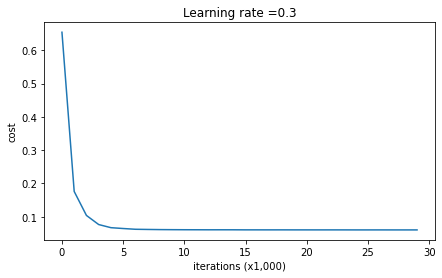

On the train set:
Accuracy: 0.9289099526066351
On the test set:
Accuracy: 0.95


In [19]:
parameters = model(train_X, train_Y, keep_prob = 0.86, learning_rate = 0.3)

print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

¡El Dropout funciona muy bien! La precisión de la prueba ha vuelto a aumentar (hasta el 95%). Su modelo no se ajusta en exceso al conjunto de entrenamiento y hace un gran trabajo en el conjunto de prueba. La selección francesa de fútbol le estará eternamente agradecida. 

Ejecute el código siguiente para trazar el límite de decisión.

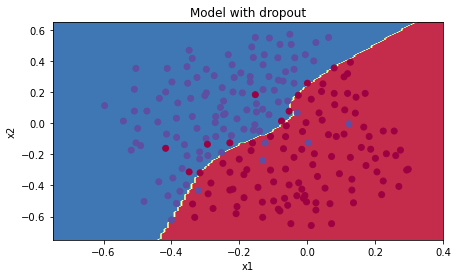

In [20]:
plt.title("Model with dropout")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**Nota**:
- Un **error común** al utilizar el dropout es utilizarlo tanto en el entrenamiento como en la prueba. Deberías usar dropout (eliminar nodos aleatoriamente) sólo en el entrenamiento. 
- Los frameworks de aprendizaje profundo como [tensorflow](https://www.tensorflow.org/api_docs/python/tf/nn/dropout), [PaddlePaddle](http://doc.paddlepaddle.org/release_doc/0.9.0/doc/ui/api/trainer_config_helpers/attrs.html), [keras](https://keras.io/layers/core/#dropout) o [caffe](http://caffe.berkeleyvision.org/tutorial/layers/dropout.html) vienen con una implementación de capas de dropout. No te estreses: pronto aprenderás alguno de estos frameworks.

<font color='green'>
    
**Lo que debes recordar sobre dropout:**
- El dropout es una técnica de regularización.
- Sólo se utiliza el dropout durante el entrenamiento. No uses dropout (eliminar nodos al azar) durante el tiempo de prueba.
- Aplique el dropout tanto durante la propagación hacia adelante como hacia atrás.
- Durante el tiempo de entrenamiento, divide cada capa de dropout por keep_prob para mantener el mismo valor esperado para las activaciones. Por ejemplo, si keep_prob es 0,5, entonces cerraremos de media la mitad de los nodos, por lo que la salida se escalará en 0,5 ya que sólo la mitad restante está contribuyendo a la solución. Dividir por 0,5 es equivalente a multiplicar por 2. Por lo tanto, la salida tiene ahora el mismo valor esperado. Puede comprobar que esto funciona incluso cuando keep_prob tiene otros valores distintos de 0,5.  

<a name='7'></a>
## 7 - Conclusions

**Estos son los resultados de nuestros tres modelos**: 

<table> 
    <tr>
        <td>
        <b>model</b>
        </td>
        <td>
        <b>train accuracy</b>
        </td>
        <td>
        <b>test accuracy</b>
        </td>
    </tr>
        <td>
        3-layer NN sin regularización
        </td>
        <td>
        95%
        </td>
        <td>
        91.5%
        </td>
    <tr>
        <td>
        3-layer NN con regularización L2
        </td>
        <td>
        94%
        </td>
        <td>
        93%
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN con dropout
        </td>
        <td>
        93%
        </td>
        <td>
        95%
        </td>
    </tr>
</table> 

Tenga en cuenta que la regularización perjudica el rendimiento del conjunto de entrenamiento. Esto se debe a que limita la capacidad de la red para sobreajustarse al conjunto de entrenamiento. Pero como en última instancia da una mayor precisión en las pruebas, está ayudando a su sistema. 

¡Enhorabuena por haber terminado esta tarea! Y también por revolucionar el fútbol francés. :-) 

<font color='green'>
    
**Lo que queremos que recuerde de este cuaderno**:
- La regularización le ayudará a reducir el sobreajuste.
- La regularización conducirá sus pesos a valores más bajos.
- La regularización L2 y el Dropout son dos técnicas de regularización muy eficaces.